In [1]:
# Title:  PCA: Principal Component Analysis
# File:   PCA.R
# Course: Data Mining with R

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  BiocManager,   # Necessary for ggbiplot
  # ggbiplot,      # Create biplots
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
)

# Install one package from GitHub; You can respond "n" if it
# asks "Do you want to install from sources the package
# which needs compilation?" The first command installs the 
# package and the second loads it in R.
p_install_gh("vqv/ggbiplot")  # Creates biplots
p_load(ggbiplot)


The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmp4YWWDO/downloaded_packages



BiocManager installed




utf8      (1.1.4 -> 1.2.1) [CRAN]
crayon    (1.4.0 -> 1.4.1) [CRAN]
cli       (2.3.0 -> 2.3.1) [CRAN]
pillar    (1.4.7 -> 1.5.1) [CRAN]
lifecycle (0.2.0 -> 1.0.0) [CRAN]
farver    (2.0.3 -> 2.1.0) [CRAN]
tibble    (3.0.6 -> 3.1.0) [CRAN]
isoband   (0.2.3 -> 0.2.4) [CRAN]


Installing 8 packages: utf8, crayon, cli, pillar, lifecycle, farver, tibble, isoband




The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//Rtmp4YWWDO/downloaded_packages
✔  checking for file ‘/private/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T/Rtmp4YWWDO/remotes165c896e19e/vqv-ggbiplot-7325e88/DESCRIPTION’ (654ms)
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   



The following packages were installed:
ggbiplot



In [2]:
## LOAD AND PREPARE DATA ####################################

# Use the `optdigits` datasets that were created previously 
# in "HandwrittenDigits.R."

# Import training data `trn`
trn <- import("data/optdigits_trn.rds")

# Import testing data `tst`
tst <- import("data/optdigits_tst.rds")

In [3]:
# PRINCIPAL COMPONENT ANALYSIS #############################

# Four methods in R (uncomment to get info)
# ?prcomp     # Most common method
# ?princomp   # Slightly different method
# ?principal  # Method from psych package
# ?PCA        # Method from FactoMineR

# Principal components model using default method
pc <- trn %>% 
  select(-y) %>%    # Exclude variable with class labels
  prcomp(           # Most common method
    center = TRUE,  # Centers means to 0
    scale  = TRUE   # Scale to unit variance (SD = 1)
  )

In [4]:
# Get summary stats
pc %>% summary()

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.3365 2.7265 2.11657 1.81144 1.68376 1.49476 1.44285
Proportion of Variance 0.2024 0.1352 0.08145 0.05966 0.05155 0.04062 0.03785
Cumulative Proportion  0.2024 0.3376 0.41901 0.47867 0.53022 0.57084 0.60869
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.32987 1.30031 1.1797 1.15238 1.11653 1.09290 1.04736
Proportion of Variance 0.03216 0.03074 0.0253 0.02415 0.02267 0.02172 0.01994
Cumulative Proportion  0.64085 0.67159 0.6969 0.72104 0.74370 0.76542 0.78536
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.00701 0.90581 0.89527 0.87186 0.86610 0.81492 0.74110
Proportion of Variance 0.01844 0.01492 0.01457 0.01382 0.01364 0.01207 0.00999
Cumulative Proportion  0.80380 0.81872 0.83329 0.84711 0.86075 0.87283 0.88281
                          PC22   PC23 

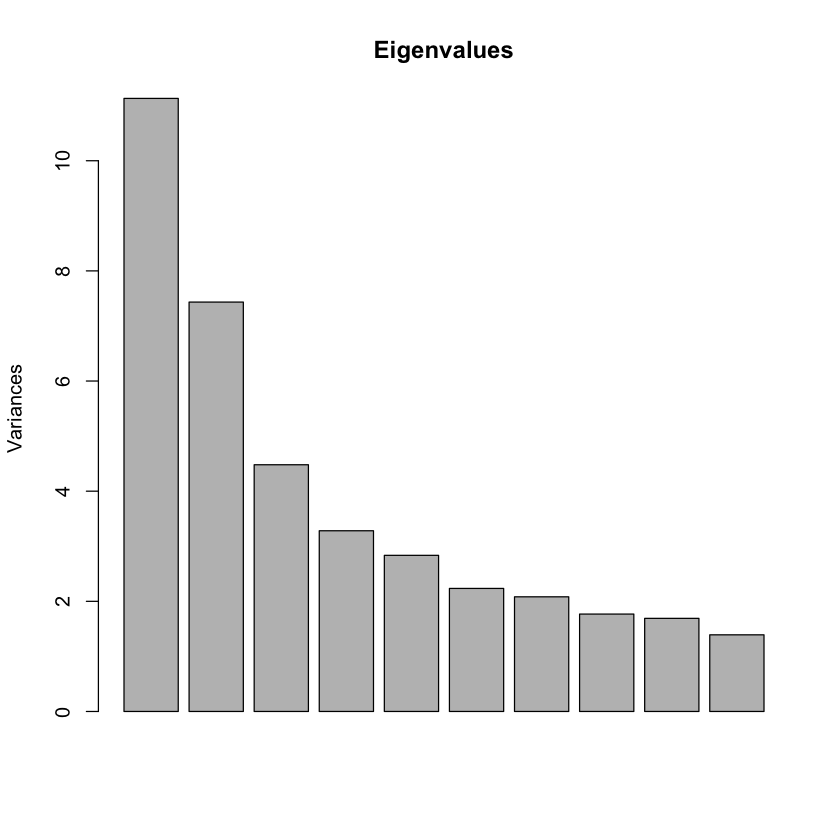

In [5]:
# Screeplot of eigenvalues
pc %>% plot(main = "Eigenvalues")

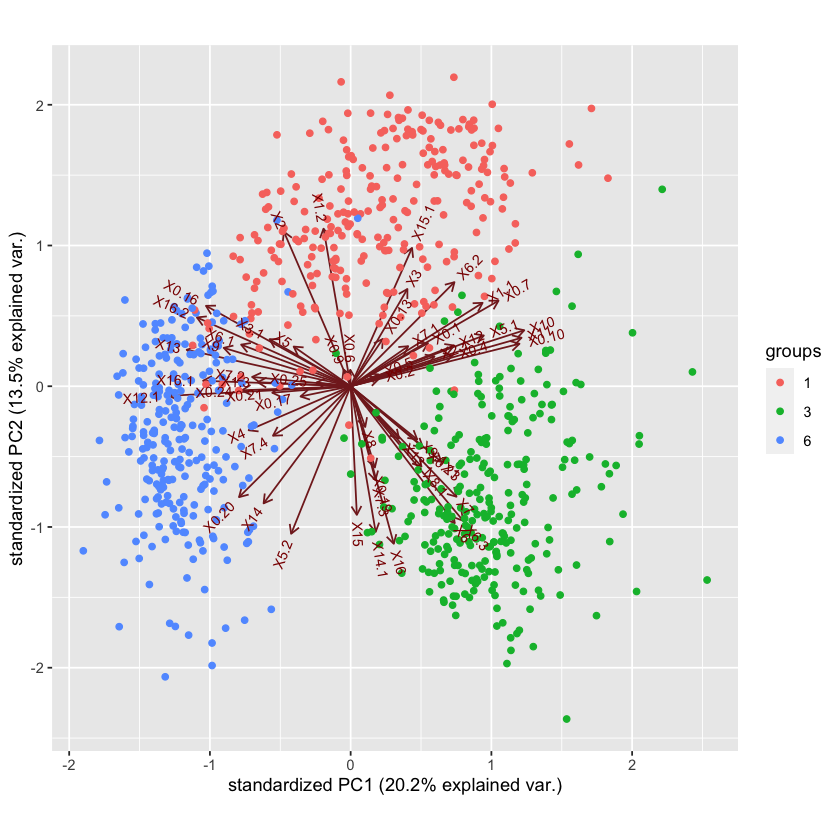

In [6]:
# Plot the projected data set on the first two principal 
# components using `ggbiplot`
pc %>% 
  ggbiplot(
    color  = trn$y,         # Color by group
    groups = factor(trn$y)  # Variable with groups
  )

In [7]:
# TEST MODEL ###############################################

# Predict with `prcomp`

# Project the test data onto the principal directions found
# with prcomp
newdata <- pc %>%  # Take PC model from training data
  predict(         # Use predict function to apply model
    tst %>%        # Apply model to the testing data
    select(-y)     # But remove the class label variable
  )

In [8]:
# Modify the PCA object with projected data
testpc <- pc         # Duplicate the PC model to `testpc`
testpc$x <- newdata  # And change x to the predicted values

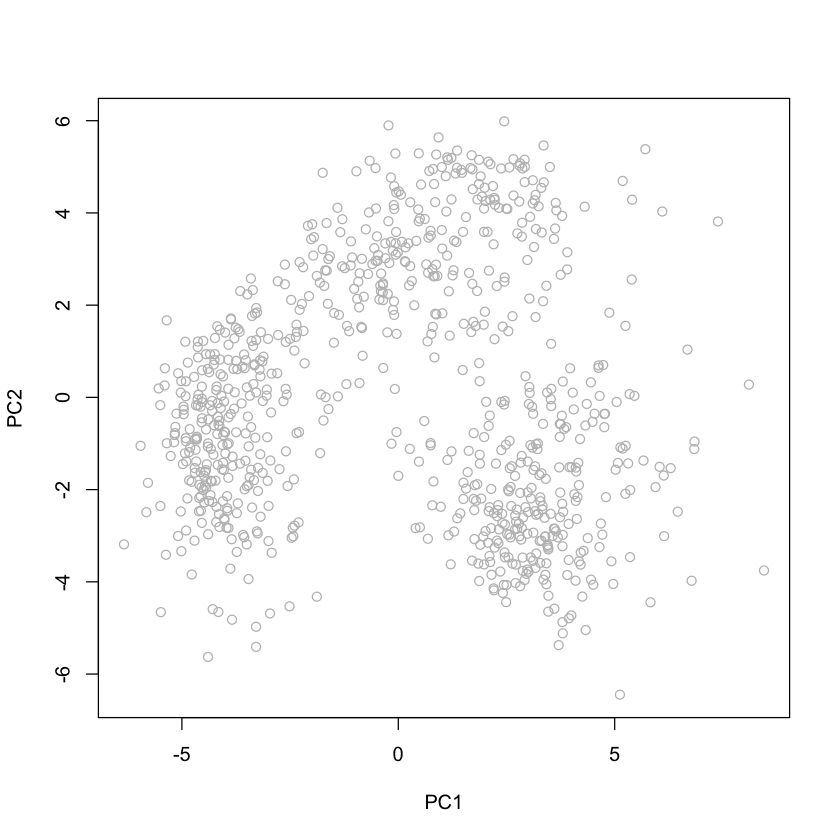

In [19]:
# Look at training and test data projections together; this
# command uses base R commands because pc objects work
# differently from tibbles
plot(               # Generic X-Y plot for training data
  pc$x[, c(1, 2)],  # From PC, select x, then col. 1 & 2
  col = "gray"      # Draw gray circles
) 

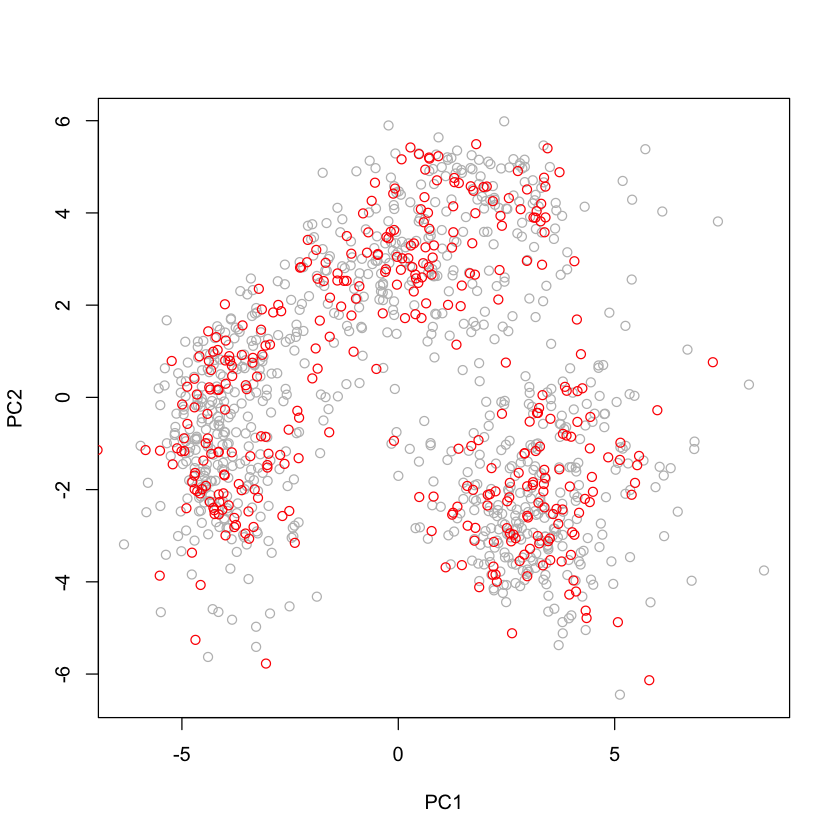

In [24]:
plot(               # Generic X-Y plot for training data
  pc$x[, c(1, 2)],  # From PC, select x, then col. 1 & 2
  col = "gray"      # Draw gray circles
) 

points(                # Add points from testing data
  newdata[, c(1, 2)],  # Select columns 1 & 2 from `newdata`
  col = "red"          # Draw red circles
)